# =======================
# CONFIG FOR THIS REPORT
# =======================
# PGA Talent Engine – Genesis Invitational 2025 Report

**Event:** Genesis Invitational 2025  
**Course:** Riviera Country Club  
**Profile:** Long, penal classical test – narrow fairways, long irons, tricky Kikuyu rough, slick Poa greens  
**Field Size:** ~120 players  
**Model:** Multi-year strokes-gained “Talent Engine” + course fit + volatility



In [1]:
# ======================================================
# 1. IMPORTS & LOAD PREDICTIONS – RIVIERA 2025
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

EVENT_ID = "riviera_2025"
EVENT_NAME = "Genesis Invitational 2025"
COURSE_NAME = "Riviera Country Club"

pred_path = f"../../Data/Tournaments/processed/{EVENT_ID}_predictions.csv"

df = pd.read_csv(pred_path)

print(f"Loaded predictions for {EVENT_NAME} at {COURSE_NAME}")
df.head(10)


Loaded predictions for Genesis Invitational 2025 at Riviera Country Club


,player_name,Tier,TalentScore,OverallRating,win_pct,top5_pct,avg_finish
0,Scottie Scheffler,S,0.89,99,2.18,10.16,44.1794
1,J.J. Spaun,S,0.43,88,2.00,8.30,47.4218
2,Tommy Fleetwood,S,0.47,89,1.92,8.46,46.5832
3,Russell Henley,S,0.37,87,1.86,7.16,51.3536
4,Rory McIlroy,A,0.35,86,1.86,7.70,49.1752
5,Viktor Hovland,S,0.43,88,1.84,7.84,47.2766
6,Patrick Cantlay,S,0.36,86,1.74,7.60,49.3596
7,Kurt Kitayama,A,0.33,86,1.70,7.16,51.4430
8,Collin Morikawa,S,0.45,89,1.56,7.46,49.4346
9,Keegan Bradley,A,0.28,84,1.56,6.62,51.2946


In [2]:
# ============================================================
# 2. BASIC DATA OVERVIEW
# ============================================================

print("Columns:", df.columns.tolist())
print("Shape:", df.shape)

# Ensure numeric columns behave correctly
num_cols = ["win_pct", "top5_pct", "avg_finish"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

df.describe()


Columns: ['player_name', 'Tier', 'TalentScore', 'OverallRating', 'win_pct', 'top5_pct', 'avg_finish']
Shape: (120, 7)


,TalentScore,OverallRating,win_pct,top5_pct,avg_finish
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.157500,81.525000,0.833333,4.166667,60.500000
std,0.137854,3.335479,0.423108,1.645558,5.825631
min,-0.020000,77.000000,0.220000,1.740000,44.179400
25%,0.040000,79.000000,0.540000,2.935000,57.117100
50%,0.140000,81.000000,0.730000,3.790000,61.388700
75%,0.230000,83.000000,1.025000,4.930000,65.097700
max,0.890000,99.000000,2.180000,10.160000,70.922400


In [3]:
# ----------------------------------------------------
# 3. TOP CONTENDERS TABLE (STYLED)
# ----------------------------------------------------

top = df.head(15)[["player_name", "win_pct", "top5_pct", "avg_finish"]]

top.style.background_gradient(cmap="YlGnBu")


,player_name,win_pct,top5_pct,avg_finish
0,Scottie Scheffler,2.180000,10.160000,44.179400
1,J.J. Spaun,2.000000,8.300000,47.421800
2,Tommy Fleetwood,1.920000,8.460000,46.583200
3,Russell Henley,1.860000,7.160000,51.353600
4,Rory McIlroy,1.860000,7.700000,49.175200
5,Viktor Hovland,1.840000,7.840000,47.276600
6,Patrick Cantlay,1.740000,7.600000,49.359600
7,Kurt Kitayama,1.700000,7.160000,51.443000
8,Collin Morikawa,1.560000,7.460000,49.434600
9,Keegan Bradley,1.560000,6.620000,51.294600


/tmp/ipykernel_61806/2486590782.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.head(15), x="player_name", y="win_pct", palette="Blues_r")


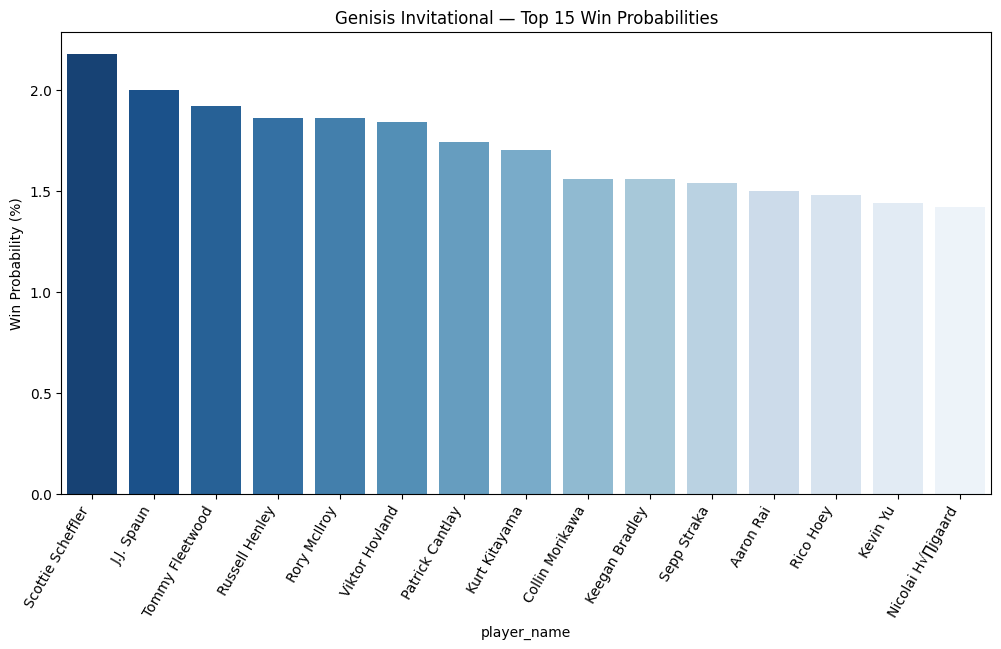

In [4]:
# ----------------------------------------------------
# 4. VISUALIZE WIN PROBABILITIES
# ----------------------------------------------------

plt.figure(figsize=(12,6))
sns.barplot(data=df.head(15), x="player_name", y="win_pct", palette="Blues_r")
plt.xticks(rotation=60, ha='right')
plt.ylabel("Win Probability (%)")
plt.title("Genisis Invitational — Top 15 Win Probabilities")
plt.show()


In [5]:
# ----------------------------------------------------
# BREAKOUT: outperforming talent rank this week
# ----------------------------------------------------

df["talent_rank"] = df["TalentScore"].rank(ascending=False, method="min")
df["win_rank"] = df["win_pct"].rank(ascending=False, method="min")

# Positive = model likes you MORE this week than your underlying talent suggests
df["breakout_score"] = df["talent_rank"] - df["win_rank"]

df_breakout = (
    df.sort_values("breakout_score", ascending=False)
      .head(10)[["player_name", "breakout_score", "talent_rank", "win_rank", "win_pct", "top5_pct"]]
)

print("Breakout Candidates (course + conditions boosting them vs baseline talent):")
df_breakout


Breakout Candidates (course + conditions boosting them vs baseline talent):


,player_name,breakout_score,talent_rank,win_rank,win_pct,top5_pct
69,Rasmus H√∏jgaard,44.0,113.0,69.0,0.66,2.84
64,Erik van Rooyen,41.0,103.0,62.0,0.70,3.32
51,Justin Rose,38.0,90.0,52.0,0.78,3.26
71,Max Greyserman,37.0,108.0,71.0,0.64,3.20
22,Ryan Fox,35.0,58.0,23.0,1.14,4.92
34,Jesper Svensson,31.0,65.0,34.0,0.94,4.56
84,Alejandro Tosti,29.0,113.0,84.0,0.56,2.66
62,Lanto Griffin,28.0,90.0,62.0,0.70,3.30
80,Sam Stevens,27.0,108.0,81.0,0.58,2.88
75,Vince Whaley,25.0,99.0,74.0,0.62,2.92


In [6]:
# ----------------------------------------------------
# BUST RISK: underperforming talent rank this week
# ----------------------------------------------------

df["bust_score"] = df["win_rank"] - df["talent_rank"]

df_bust = (
    df.sort_values("bust_score", ascending=False)
      .head(10)[["player_name", "bust_score", "talent_rank", "win_rank", "win_pct", "avg_finish"]]
)

print("Bust Risk Players (model likes them LESS than their long-term talent):")
df_bust


Bust Risk Players (model likes them LESS than their long-term talent):


,player_name,bust_score,talent_rank,win_rank,win_pct,avg_finish
77,Lee Hodges,53.0,24.0,77.0,0.60,58.8248
111,Jhonattan Vegas,37.0,74.0,111.0,0.36,61.7590
116,Niklas Norgaard,33.0,84.0,117.0,0.32,65.0828
88,Mac Meissner,31.0,58.0,89.0,0.54,61.6554
102,Harris English,29.0,74.0,103.0,0.44,64.4692
91,Max McGreevy,29.0,63.0,92.0,0.52,62.5408
86,Zac Blair,26.0,58.0,84.0,0.56,62.9730
107,Jackson Suber,26.0,82.0,108.0,0.40,65.6410
46,Doug Ghim,25.0,21.0,46.0,0.82,59.3838
76,Henrik Norlander,24.0,53.0,77.0,0.60,64.1640


In [7]:
# ======================================================
# 7. TEXT SUMMARY FOR THIS EVENT
# ======================================================

# Top 10 by win %
top10 = df.sort_values("win_pct", ascending=False).head(10)

# Breakout candidates: high win/top5 vs baseline TalentScore rank
breakout = df.copy()
breakout["talent_rank"] = breakout["TalentScore"].rank(ascending=False, method="min")
breakout["win_rank"] = breakout["win_pct"].rank(ascending=False, method="min")
breakout["breakout_delta"] = breakout["talent_rank"] - breakout["win_rank"]
breakout = breakout.sort_values("breakout_delta", ascending=False).head(5)

# Bust-risk: good TalentScore but poor win % rank
bust = df.copy()
bust["bust_delta"] = bust["win_rank"] - bust["talent_rank"]
bust = bust.sort_values("bust_delta", ascending=False).head(5)

lines = []

lines.append(f"{EVENT_NAME} – {COURSE_NAME}")
lines.append("")
lines.append("Top 10 win probabilities:")
for _, row in top10.iterrows():
    lines.append(
        f"  - {row['player_name']}: {row['win_pct']:.2f}% win, "
        f"{row['top5_pct']:.1f}% top-5, avg finish {row['avg_finish']:.1f}"
    )

lines.append("")
lines.append("Breakout candidates (overperforming raw talent ranking):")
for _, row in breakout.iterrows():
    lines.append(
        f"  - {row['player_name']} (Tier {row['Tier']}): "
        f"win rank {int(row['win_rank'])}, talent rank {int(row['talent_rank'])}"
    )

lines.append("")
lines.append("Bust-risk players (strong talent but softer Riviera outlook):")
for _, row in bust.iterrows():
    lines.append(
        f"  - {row['player_name']} (Tier {row['Tier']}): "
        f"talent rank {int(row['talent_rank'])}, win rank {int(row['win_rank'])}"
    )

summary_text = "\n".join(lines)
print(summary_text)


Genesis Invitational 2025 – Riviera Country Club

Top 10 win probabilities:
  - Scottie Scheffler: 2.18% win, 10.2% top-5, avg finish 44.2
  - J.J. Spaun: 2.00% win, 8.3% top-5, avg finish 47.4
  - Tommy Fleetwood: 1.92% win, 8.5% top-5, avg finish 46.6
  - Russell Henley: 1.86% win, 7.2% top-5, avg finish 51.4
  - Rory McIlroy: 1.86% win, 7.7% top-5, avg finish 49.2
  - Viktor Hovland: 1.84% win, 7.8% top-5, avg finish 47.3
  - Patrick Cantlay: 1.74% win, 7.6% top-5, avg finish 49.4
  - Kurt Kitayama: 1.70% win, 7.2% top-5, avg finish 51.4
  - Collin Morikawa: 1.56% win, 7.5% top-5, avg finish 49.4
  - Keegan Bradley: 1.56% win, 6.6% top-5, avg finish 51.3

Breakout candidates (overperforming raw talent ranking):
  - Rasmus H√∏jgaard (Tier C): win rank 69, talent rank 113
  - Erik van Rooyen (Tier C): win rank 62, talent rank 103
  - Justin Rose (Tier C): win rank 52, talent rank 90
  - Max Greyserman (Tier C): win rank 71, talent rank 108
  - Ryan Fox (Tier B): win rank 23, talent ra

In [8]:
from pathlib import Path
import subprocess

NOTEBOOK_NAME = "riviera_2025_analysis.ipynb"          # this notebook’s filename
HTML_NAME = f"{EVENT_ID}_analysis.html"                # e.g. riviera_2025_analysis.html

output_dir = Path("../../Data/Tournaments/processed").resolve()
output_dir.mkdir(parents=True, exist_ok=True)

result = subprocess.run(
    [
        "jupyter", "nbconvert",
        "--to", "html",
        "--output", HTML_NAME,
        "--output-dir", str(output_dir),
        NOTEBOOK_NAME,
    ],
    capture_output=True,
    text=True,
)

if result.returncode != 0:
    print("nbconvert failed:")
    print(result.stderr)
else:
    final_path = output_dir / HTML_NAME
    print(f"✅ HTML report saved to:\n{final_path}")


✅ HTML report saved to:
/workspaces/PGA-Analysis/Data/Tournaments/processed/riviera_2025_analysis.html


In [9]:
# ======================================================
# 8. OPTIONAL – SAVE SUMMARY TO TEXT FILE
# ======================================================

out_path = f"../../Data/Tournaments/processed/{EVENT_ID}_summary.txt"

with open(out_path, "w") as f:
    f.write(summary_text)

print(f"Saved summary to: {out_path}")


Saved summary to: ../../Data/Tournaments/processed/riviera_2025_summary.txt
